In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

# 1. Data Reading & Understanding 

In [4]:
df = pd.read_csv("insurance.csv")
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


# 2. Check for Dtypes

In [5]:
dtypes = df.dtypes
n_unique = df.nunique()
pd.DataFrame({"Dtypes": dtypes, "N_Uniq": n_unique}).T

,age,sex,bmi,children,smoker,region,charges
Dtypes,int64,object,float64,int64,object,object,float64
N_Uniq,47,2,548,6,2,4,1337


In [6]:
cat_cols = ['sex', 'children', 'smoker', 'region']
df[cat_cols] = df[cat_cols].astype("category")

In [7]:
pd.DataFrame(df.dtypes).T

,age,sex,bmi,children,smoker,region,charges
0,int64,category,float64,category,category,category,float64


# 3. Null Values

In [8]:
pd.DataFrame(df.isnull().sum()).T

,age,sex,bmi,children,smoker,region,charges
0,0,0,0,0,0,0,0


# 4. Outliers

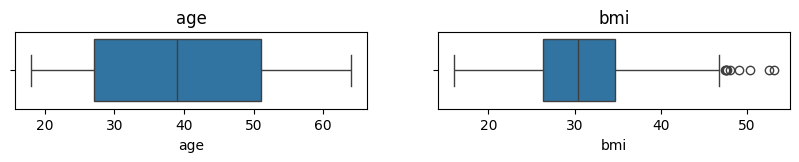

In [9]:
num_cols = ['age', 'bmi']
plt.figure(figsize=(10, 1))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    plt.title(f"{col}")
    sns.boxplot(df[col], orient="h")
plt.show()

In [10]:
Q1 = df.bmi.quantile(.25)
Q3 = df.bmi.quantile(.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
outliers = df[df.bmi > upper].bmi.values
df.bmi.replace(outliers, upper, inplace=True)

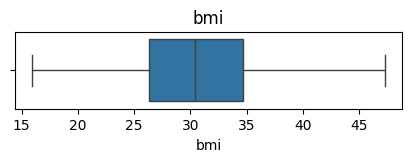

In [11]:
plt.figure(figsize=(5, 1))
plt.title("bmi")
sns.boxplot(df.bmi, orient="h")
plt.show()

# 5. Visualization 

In [12]:
num_cols = ['age', 'bmi']
cat_cols = ['sex', 'children', 'smoker', 'region']

### Check for relation between each feature & the targer

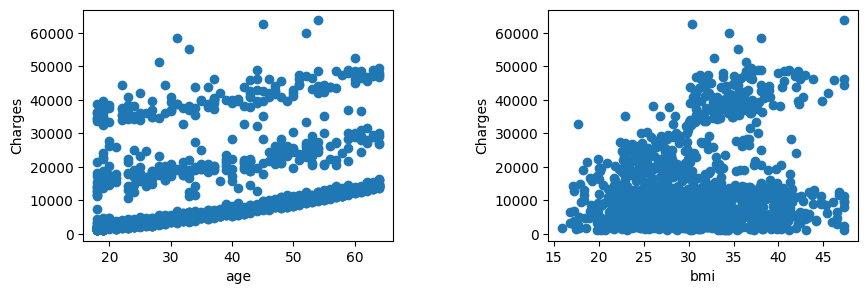

In [13]:
plt.figure(figsize=(10, 3))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    plt.xlabel(f"{col}")
    plt.ylabel("Charges")
    plt.scatter(df[col], df.charges)
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

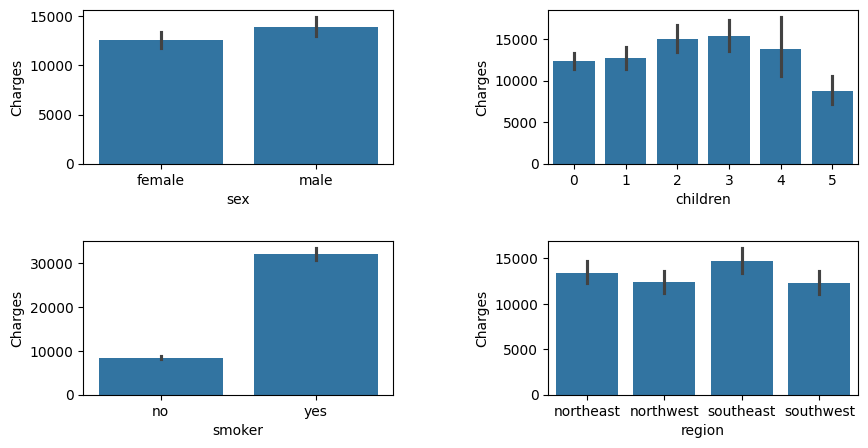

In [14]:
plt.figure(figsize=(10, 5))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i+1)
    plt.xlabel(f"{col}")
    plt.ylabel("Charges")
    sns.barplot(x=col, y="charges", data=df)
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

### Check for Variation

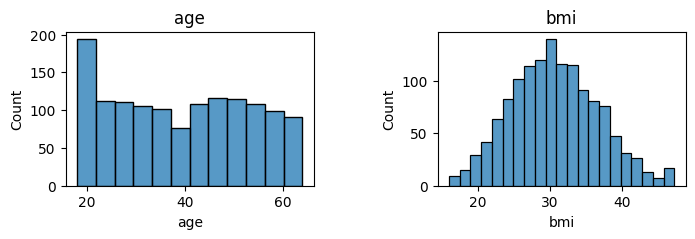

In [15]:
plt.figure(figsize=(8, 2))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    plt.title(f"{col}")
    sns.histplot(x=col, data=df)
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

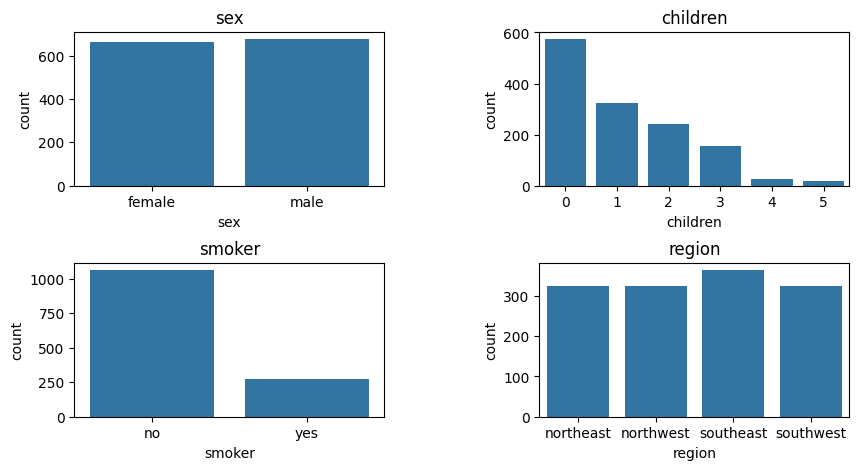

In [16]:
plt.figure(figsize=(10, 5))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i+1)
    plt.title(f"{col}")
    sns.countplot(x=col, data=df)
plt.subplots_adjust(hspace=.5, wspace=.5)
plt.show()

# 6. Duplicates

In [17]:
print(df.duplicated().sum())
df.drop_duplicates(keep="first", inplace=True)
print(df.duplicated().sum())

1
0


# 7. Splitting Data 

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]



,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


# 8. Normalization

In [19]:
from sklearn.preprocessing import MinMaxScaler
cols_to_norm = X.select_dtypes("number").columns
scaler = MinMaxScaler()

In [20]:
X[cols_to_norm] = scaler.fit_transform(X[cols_to_norm])

# 9. Encoding

In [21]:
pd.DataFrame({"Dtype":X.dtypes, "Num_Unique": X.nunique()}).T

,age,sex,bmi,children,smoker,region
Dtype,float64,category,float64,category,category,category
Num_Unique,47,2,540,6,2,4


- **Ordinal Encoding**

In [22]:
from category_encoders import OrdinalEncoder
cols_to_encode = ['sex', 'smoker']
ordinal_encoder = OrdinalEncoder(cols=cols_to_encode)
X = ordinal_encoder.fit_transform(X)

- **One Hot Encoding**

In [23]:
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols=["region"])
X = encoder.fit_transform(X)

In [24]:
X

,age,sex,bmi,children,smoker,region_1,region_2,region_3,region_4
0,0.021739,1,0.381104,0,1,1,0,0,0
1,0.000000,2,0.568465,1,2,0,1,0,0
2,0.217391,2,0.543888,3,2,0,1,0,0
3,0.326087,2,0.215289,0,2,0,0,1,0
4,0.304348,2,0.412384,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,0.695652,2,0.479094,3,2,0,0,1,0
1334,0.000000,1,0.509416,0,2,0,0,0,1
1335,0.000000,1,0.666773,0,2,0,1,0,0
1336,0.065217,1,0.314076,0,2,1,0,0,0
